What is load_iris()? Training Wheels! Please let the AI overlords take over.

In [1]:
# numpy hard_dependencie for pandas, along with pytz and deteutil. If you check the pandas __init__ file you will see that it imports them
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)
# Would also like to drop aga. But I going try something else

In [6]:
titanic_df['Age'] = titanic_df['Age'].fillna(method='ffill')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(method='ffill')
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [7]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

Survived  Pclass   Age  SibSp  Parch Embarked  Sex_female  Sex_male
0         0       3  22.0      1      0        S       False      True
1         1       1  38.0      1      0        C        True     False
2         1       3  26.0      0      0        S        True     False
3         1       1  35.0      1      0        S        True     False
4         0       3  35.0      0      0        S       False      True

Now, we do the same to the "Embarked" column.

In [9]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C   
0         0       3  22.0      1      0       False      True       False  \
1         1       1  38.0      1      0        True     False        True   
2         1       3  26.0      0      0        True     False       False   
3         1       1  35.0      1      0        True     False       False   
4         0       3  35.0      0      0       False      True       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

Select relevant variables from the data and split the data into a training, development, and test set.

In [10]:
X = titanic_df.drop(columns=['Survived'])
Y = titanic_df['Survived']
features = X.columns
X.head()

Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q   
0       3  22.0      1      0       False      True       False       False  \
1       1  38.0      1      0        True     False        True       False   
2       3  26.0      0      0        True     False       False       False   
3       1  35.0      1      0        True     False       False       False   
4       3  35.0      0      0       False      True       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True

Select relevant variables from the data and split the data into a training,
development, and test set.

In [11]:
# I really want to put the age in to buckets
# the Ultimate Question of Life
X_train_dev, X_test, Y_train_dev, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_dev, Y_train_dev, test_size=0.2, random_state=42)
X_train.shape

(569, 9)

Train a decision tree and make a plot of it

In [12]:
# Look. We have been through this. 42
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, Y_train)
# default max_depth is None
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

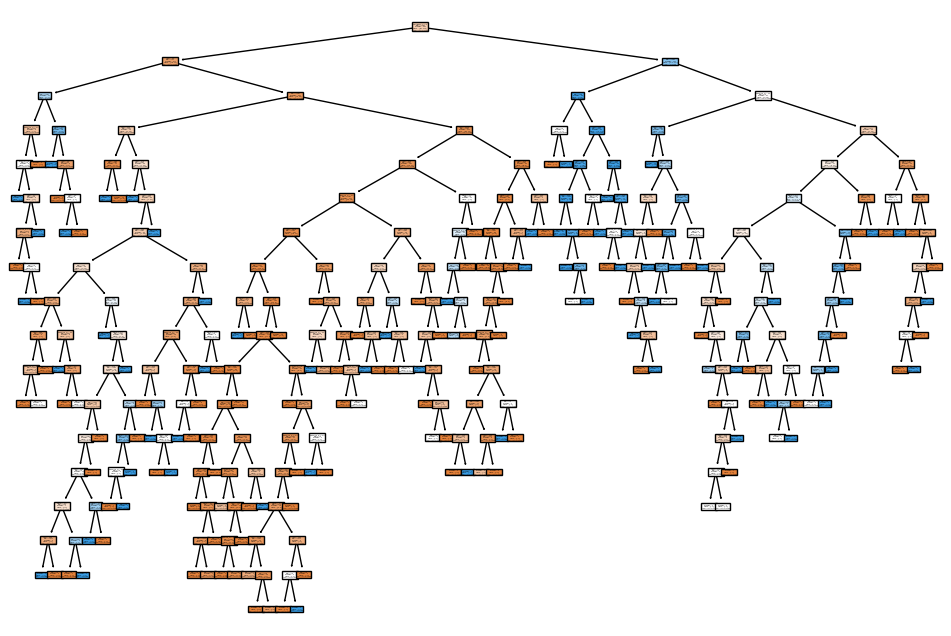

In [13]:
# And thw plot
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

Compute model’s accuracy on the development set.

In [14]:
print("Performance without pruning:", clf.score(X_dev, Y_dev))
print("At depth:", clf.tree_.max_depth)

Performance without pruning: 0.7342657342657343
At depth: 17


0.73 is reasonably accurate

Try building your model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

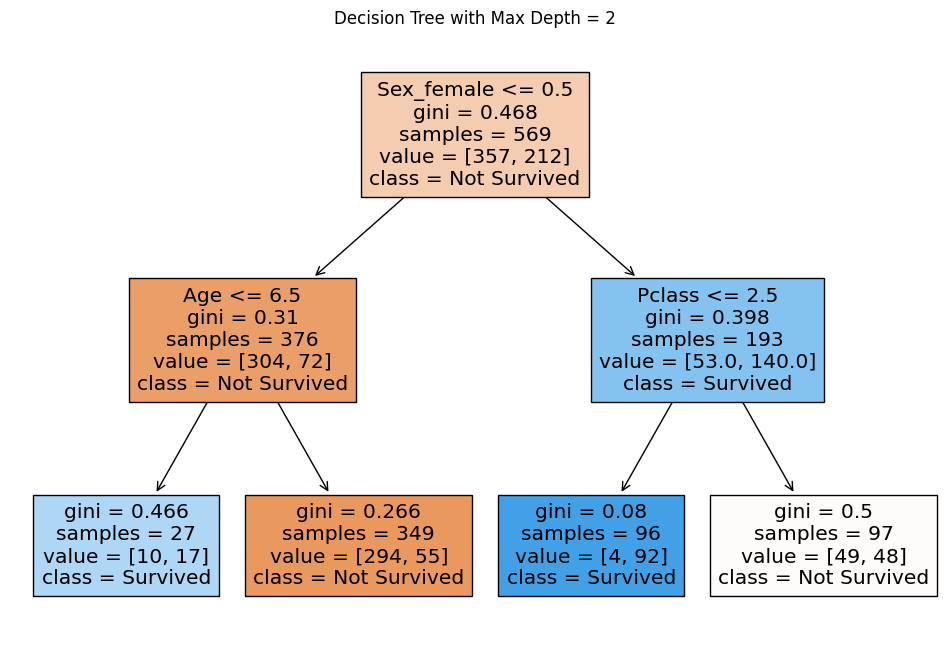

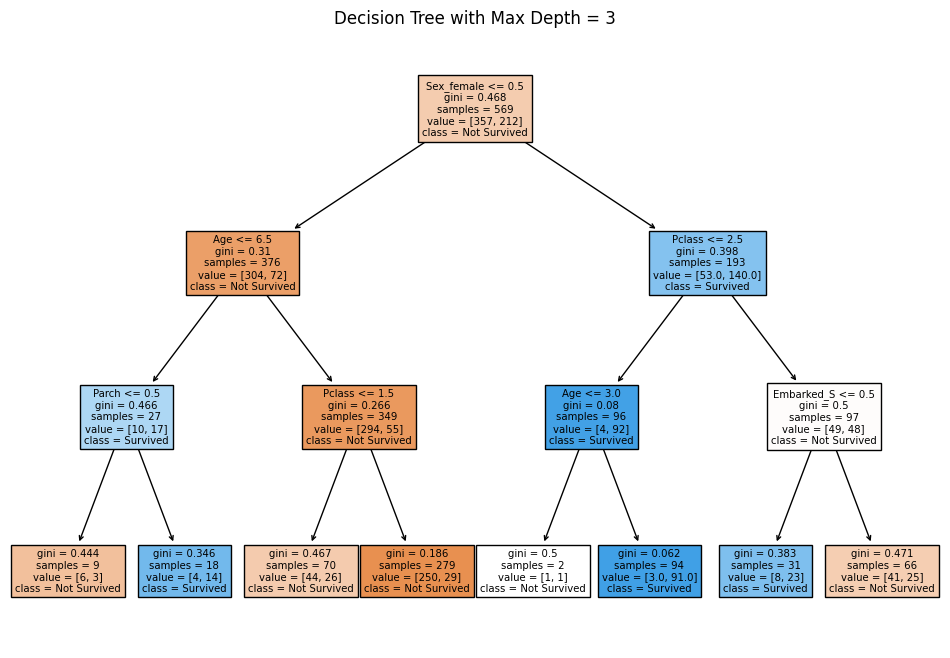

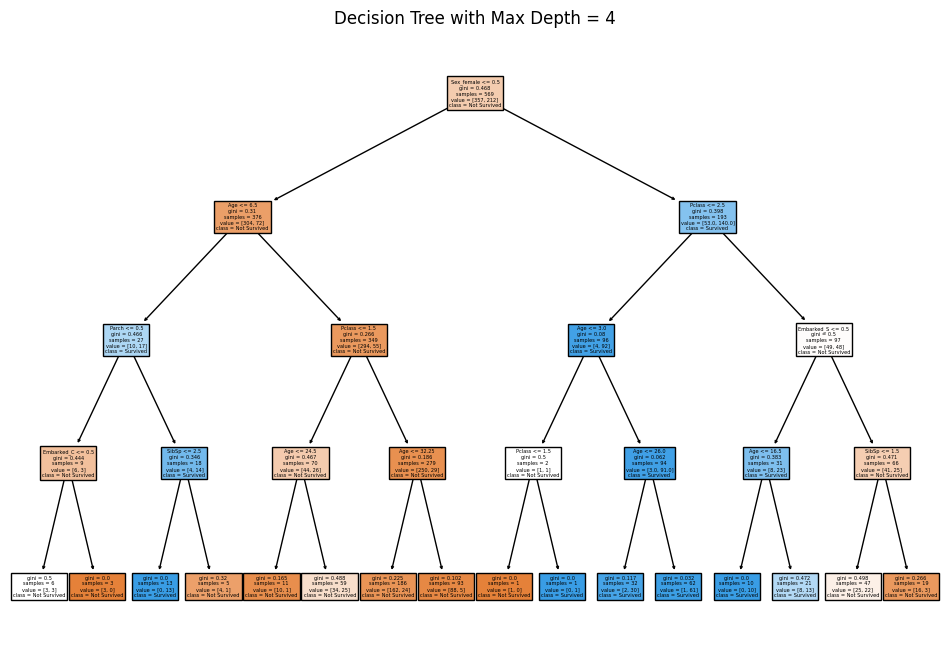

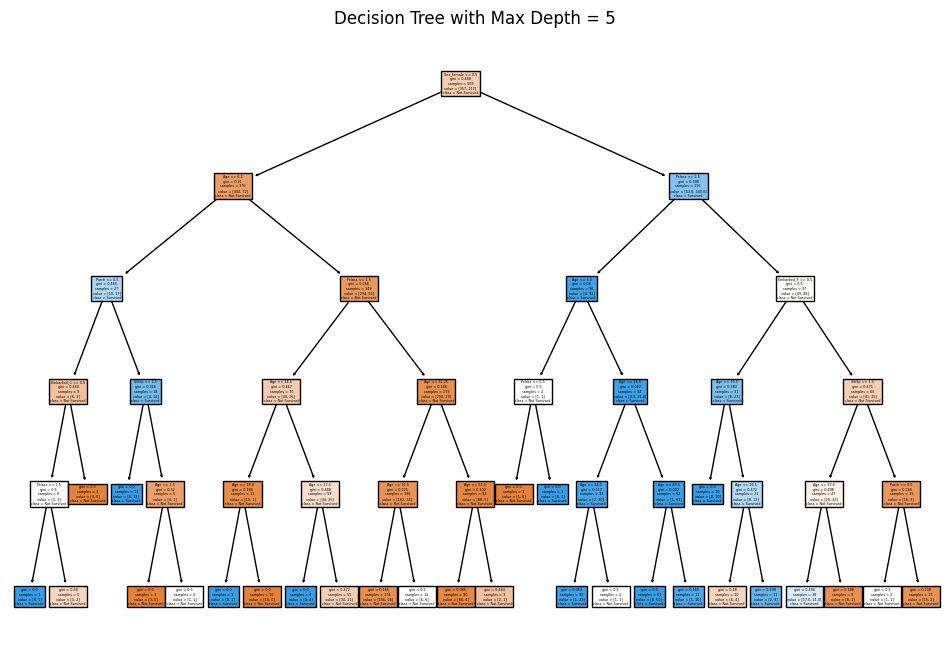

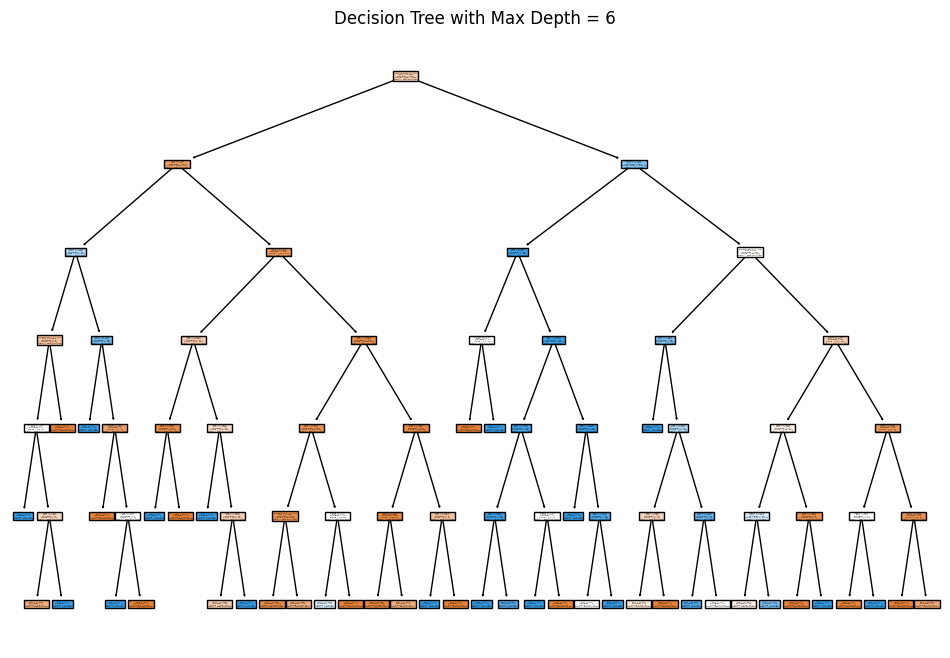

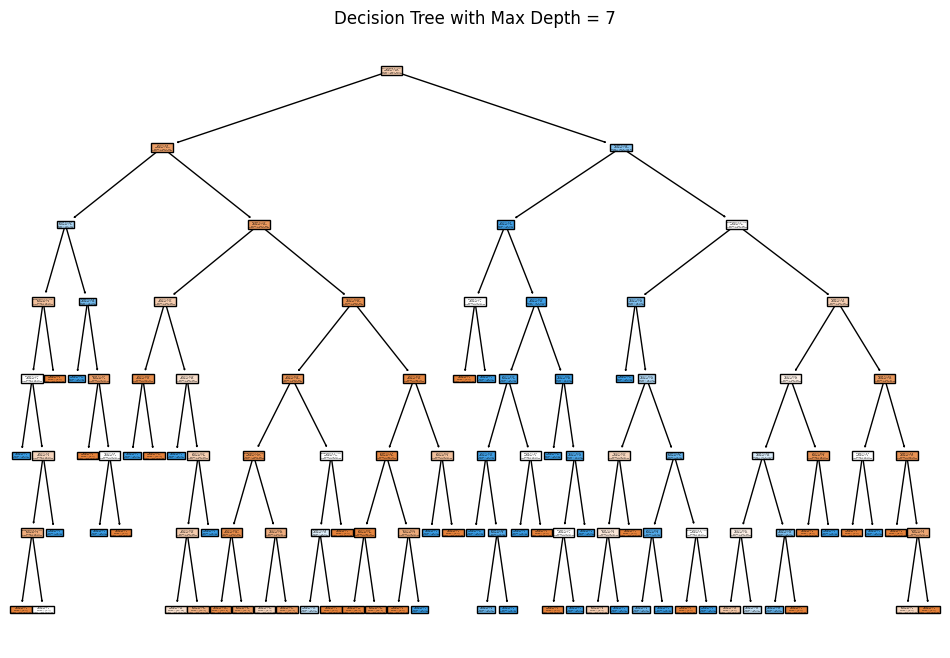

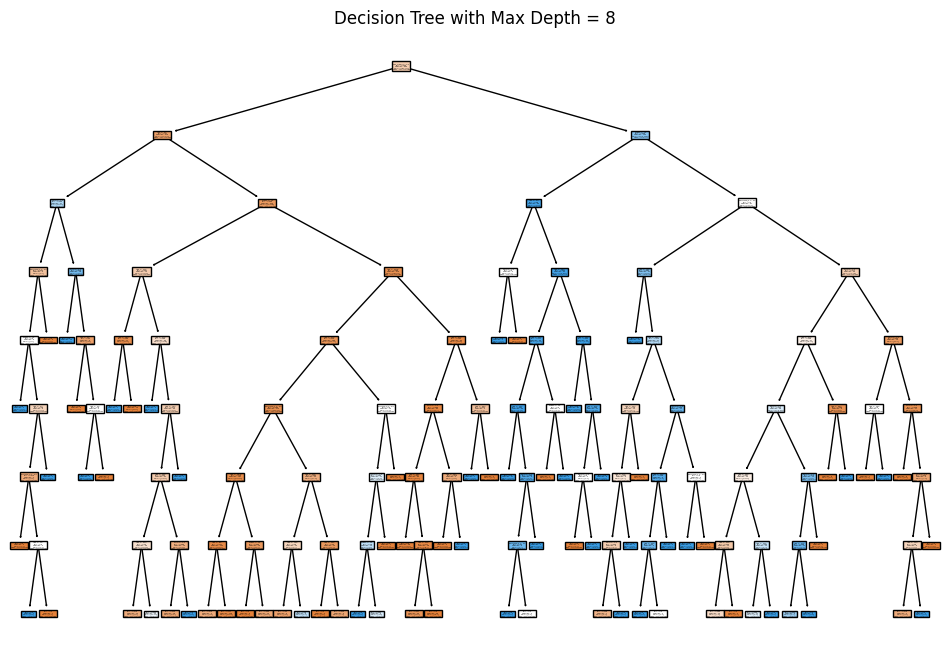

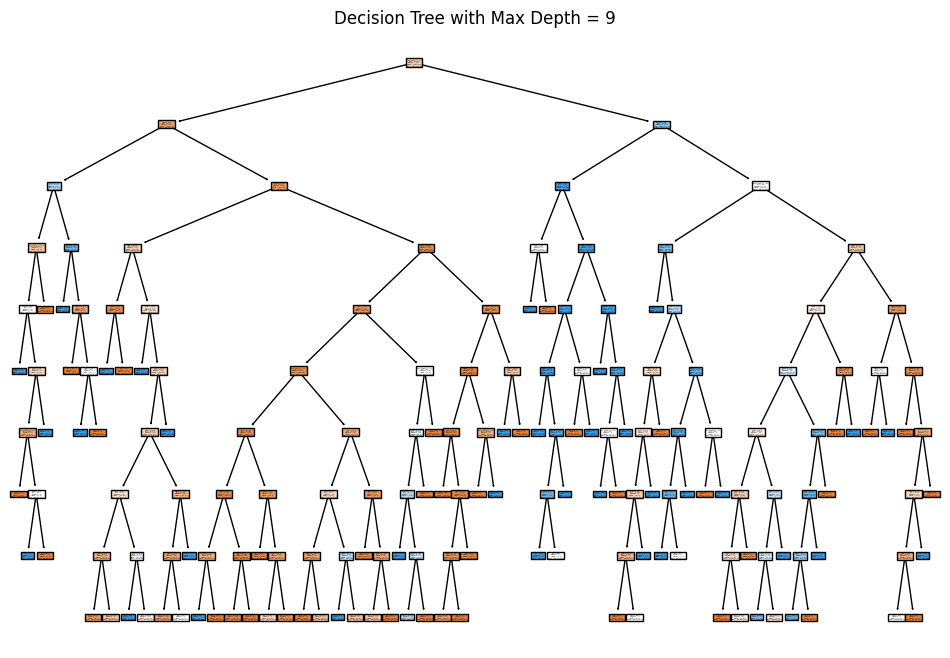

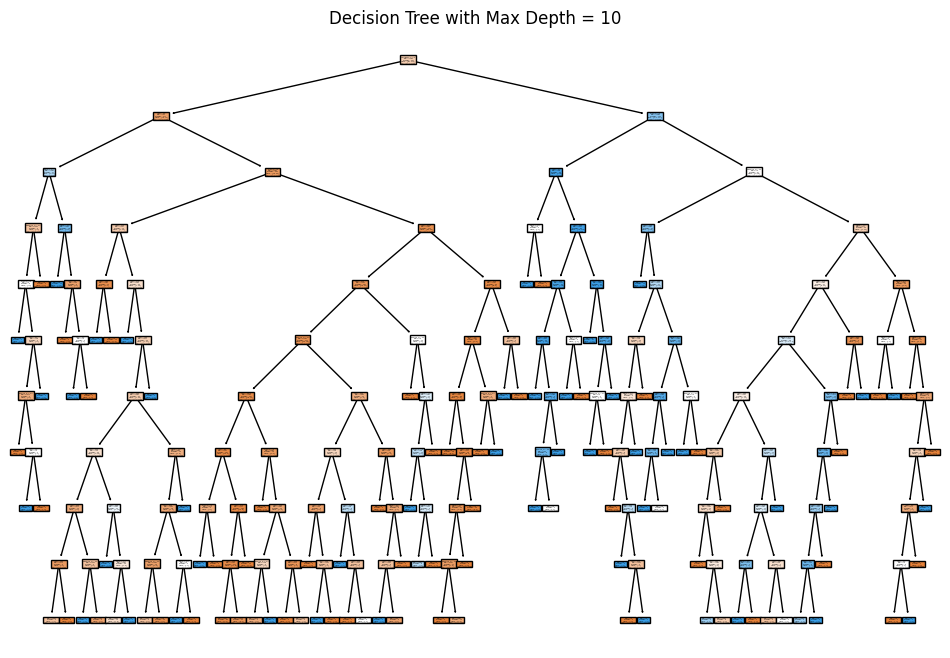

In [15]:
depths_score_t = []
depths_score_d = []
for i in range(2, 11):
    n = DecisionTreeClassifier(max_depth=i, random_state=42)
    n.fit(X_train, Y_train)

    train_p = n.predict(X_train)
    dev_p = n.predict(X_dev)

    train_accurcay = accuracy_score(Y_train, train_p)
    dev_accurcay = accuracy_score(Y_dev, dev_p)
    depths_score_t.append(train_accurcay)
    depths_score_d.append(dev_accurcay)
    
    plt.figure(figsize=(12, 8))
    plot_tree(n, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree with Max Depth = {i}')
    plt.show()

In [16]:
# I left this is as I found it intresting
test = DecisionTreeClassifier(max_depth=4, random_state=42)
test.fit(X_train, Y_train)
test.score(X_test, Y_test)

0.7932960893854749

Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means

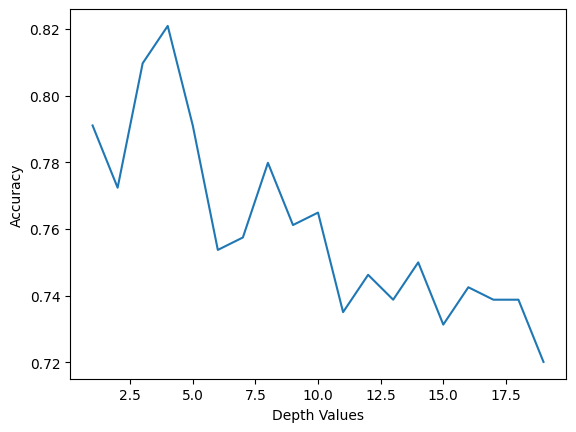

In [14]:
fig, ax = plt.subplots()
ax.plot(range(1, clf.tree_.max_depth + 1), depths_score)
plt.xlabel("Depth Values")
plt.ylabel("Accuracy")
plt.show()

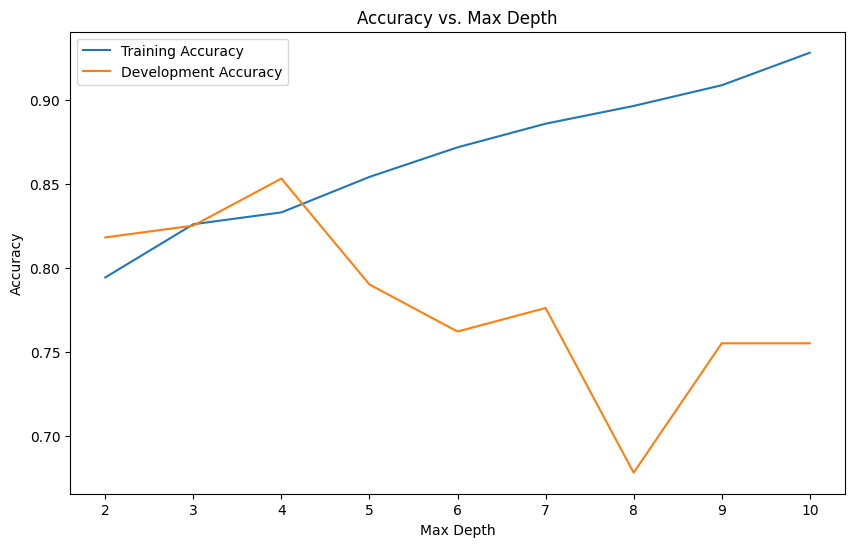

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), depths_score_t, label='Training Accuracy')
plt.plot(range(2, 11), depths_score_d, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.show()

I am working way ahead I'm treading water, AVG COMPLETION TIME is 20 May. I am working way ahead and seeing what I can do, and expect lots of errors.

Report the accuracy of your final model on the test data